In [1]:
#numpy and pandas initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/farid33/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#Loading the playtennis data
playtennis = pd.read_csv("data_sources/data-science/playtennis.csv")

In [3]:
playtennis.head(5)

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


<Axes: >

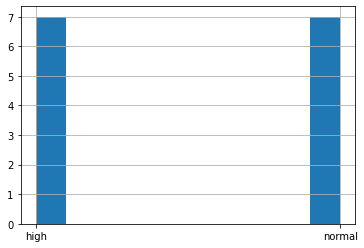

In [4]:
playtennis['humidity'].hist()

<Axes: >

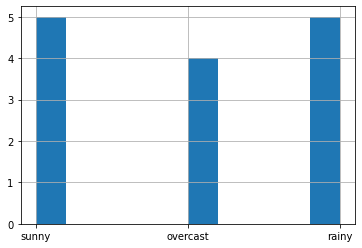

In [5]:
playtennis['outlook'].hist()

<Axes: >

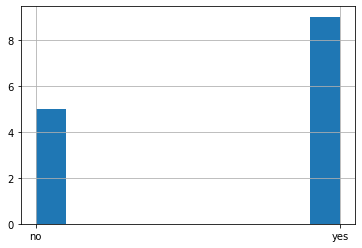

In [6]:
playtennis['play'].hist()

In [7]:
#get unique labels
print(playtennis['outlook'].unique())
print(playtennis['temp'].unique())
print(playtennis['humidity'].unique())
print(playtennis['windy'].unique())
print(playtennis['play'].unique())

['sunny' 'overcast' 'rainy']
['hot' 'mild' 'cool']
['high' 'normal']
[False  True]
['no' 'yes']


In [8]:
#using label encoder
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder() #each categorical value is assigned a numerical value(0,1,2...)
playtennis['outlook']=Le.fit_transform(playtennis['outlook'])
playtennis['temp']=Le.fit_transform(playtennis['temp'])
playtennis['humidity']=Le.fit_transform(playtennis['humidity'])
playtennis['windy']=Le.fit_transform(playtennis['windy'])
playtennis['play']=Le.fit_transform(playtennis['play'])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
#After applying label encoding, each unique column labels is converted into unique numerical values between 0 to number of labels in each column
#each value represent a unique label e.g in "outlook" column 2 is the label for "sunny", 0 is the label for "overcast", and 1 is a label for "rainy".
print(playtennis['outlook'].unique())
print(playtennis['temp'].unique())
print(playtennis['humidity'].unique())
print(playtennis['windy'].unique())
print(playtennis['play'].unique())

[2 0 1]
[1 2 0]
[0 1]
[0 1]
[0 1]


In [10]:
playtennis

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [11]:
y=playtennis['play'] #decision column
x=playtennis.drop(['play'],axis=1) #dropping

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
#split the data

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [14]:
#building decision tree
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [15]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.3333333333333333


In [16]:
def predict_play():
    Le = LabelEncoder()

    outlook = input("Enter the outlook (sunny, overcast,rainy): ")
    temp = input("Enter the temperature (hot,mild,cool): ")
    humidity = input("Enter the humidity (high, normal): ")
    windy = input("Is it windy ? (True, False): ")

    windy = True if windy.lower() == 'true' else False

    user_input = pd.DataFrame({'outlook': [outlook],
                               'temp' : [temp],
                               'humidity' : [humidity],
                               'windy' : [windy]})
    for column in x.columns:
        user_input[column] = Le.fit_transform(user_input[column])

    prediction = clf.predict(user_input)
    prediction = "yes" if prediction[0] == 1 else "no"

    print("Based on the conditions, should you play tennis ?", prediction)

predict_play()

Enter the outlook (sunny, overcast,rainy):  overcast
Enter the temperature (hot,mild,cool):  hot
Enter the humidity (high, normal):  high
Is it windy ? (True, False):  true


Based on the conditions, should you play tennis ? yes


In [17]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from sklearn import tree

In [20]:
from dtreeviz.trees import *

In [23]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 1
|   |--- feature_0 >  0.50
|   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 0



[Text(0.4444444444444444, 0.875, 'humidity <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = no'),
 Text(0.2222222222222222, 0.625, 'outlook <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = yes'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = yes'),
 Text(0.6666666666666666, 0.625, 'windy <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = no'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = no'),
 Text(0.7777777777777778, 0.375, 'outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes')]

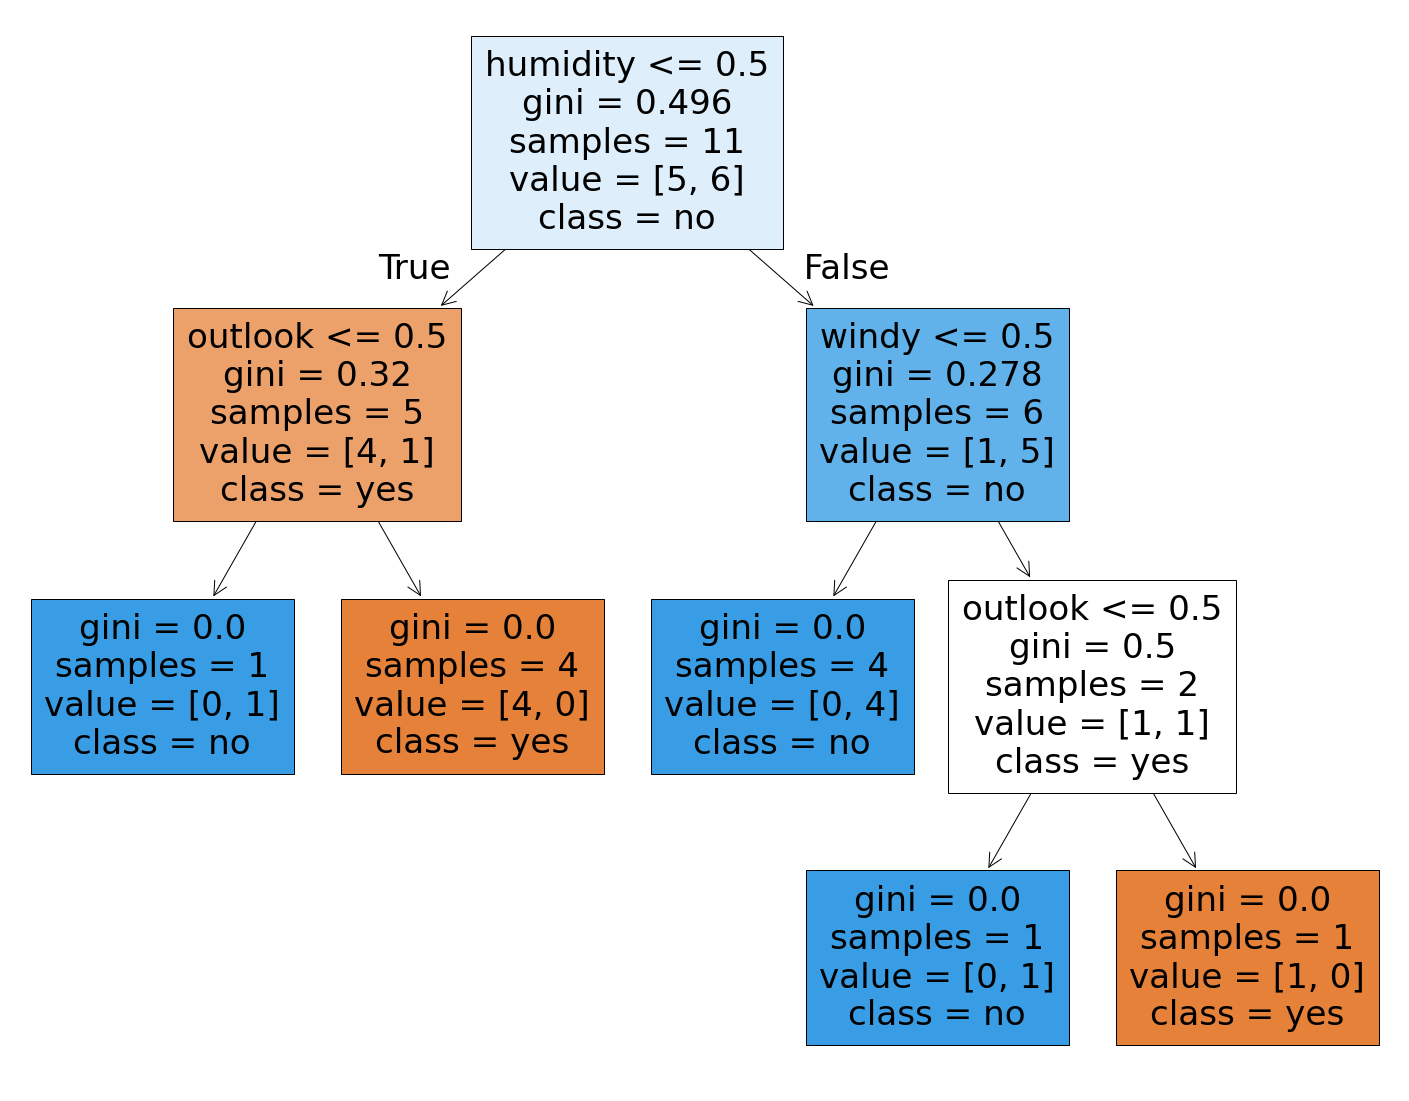

In [26]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=x.columns, class_names=['yes','no'], filled=True)